In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df_olympic = pd.read_csv('athlete_events.csv')

In [3]:
df_olympic.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


Data Describtion

In [4]:
df_olympic.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [5]:
df_olympic[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [6]:
df_olympic.describe(include = 'object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


### Describing Males and Females in sports

In [7]:
df_olympic[df_olympic['Sex'] == "F"].groupby(['Sport']).describe().head()

ID                                                \
                    count          mean           std      min      25%   
Sport                                                                     
Alpine Skiing      3398.0  67302.975574  37425.139152    126.0  36467.0   
Alpinism              1.0  31057.000000           NaN  31057.0  31057.0   
Archery            1015.0  71459.375369  39513.911416    154.0  36474.0   
Art Competitions    377.0  64952.405836  39643.324650    677.0  27013.0   
Athletics         11666.0  68277.684725  39327.454841      8.0  33868.5   

                                                   Age             ... Weight  \
                      50%       75%       max    count       mean  ...    75%   
Sport                                                              ...          
Alpine Skiing     64919.0   99394.0  135492.0   3398.0  22.334609  ...   66.0   
Alpinism          31057.0   31057.0   31057.0      1.0  43.000000  ...    NaN   
Archery           70004.0  104970.0  134488.0   1005.0  26.508458  ...   65.0   
Art Competitions  61502.0  100443.0  135073.0    301.0  44.411960  ...    NaN   
Athletics         69405.5  101559.0  135563.0  11622.0  24.933574  ...   64.0   

                            Year                                          \
                    max    count         mean        std     min     25%   
Sport                                                                      
Alpine Skiing      90.0   3398.0  1987.476162  20.121354  1936.0  1972.0   
Alpinism            NaN      1.0  1936.000000        NaN  1936.0  1936.0   
Archery            95.0   1015.0  1994.518227  21.556298  1904.0  1988.0   
Art Competitions    NaN    377.0  1934.546419   7.560296  1920.0  1932.0   
Athletics         136.0  11666.0  1990.807132  21.166966  1928.0  1976.0   

                                          
                     50%     75%     max  
Sport                                     
Alpine Skiing     1992.0  2006.0  2014.0  
Alpinism          1936.0  1936.0  1936.0  
Archery           1996.0  2008.0  2016.0  
Art Competitions  1932.0  1936.0  1948.0  
Athletics         1996.0  2008.0  2016.0  

[5 rows x 40 columns]

In [8]:
df_olympic[df_olympic['Sex'] == "M"].groupby(['Sport']).describe().head()

ID                                                    \
                   count           mean           std       min        25%   
Sport                                                                        
Aeronautics          1.0  107506.000000           NaN  107506.0  107506.00   
Alpine Skiing     5431.0   65976.949181  39306.207766      20.0   33131.00   
Alpinism            24.0   81663.583333  37478.595998   15656.0   62277.75   
Archery           1319.0   70673.739196  39696.435137     541.0   35402.50   
Art Competitions  3201.0   66682.060918  38295.552152      19.0   33229.00   

                                                    Age             ...  \
                       50%        75%       max   count       mean  ...   
Sport                                                               ...   
Aeronautics       107506.0  107506.00  107506.0     1.0  26.000000  ...   
Alpine Skiing      63006.0  100679.00  135540.0  5353.0  23.758266  ...   
Alpinism           97021.0  109615.25  128001.0    15.0  38.533333  ...   
Archery            69303.0  104769.50  134623.0  1249.0  29.083267  ...   
Art Competitions   64997.0   99535.00  135536.0  2770.0  46.062816  ...   

                 Weight           Year                                  \
                    75%    max   count         mean        std     min   
Sport                                                                    
Aeronautics         NaN    NaN     1.0  1936.000000        NaN  1936.0   
Alpine Skiing      85.0  107.0  5431.0  1983.781624  20.547896  1936.0   
Alpinism            NaN    NaN    24.0  1925.166667   3.225802  1924.0   
Archery            84.0  130.0  1319.0  1982.159212  34.446618  1900.0   
Art Competitions   76.5   93.0  3201.0  1933.018432   6.946040  1912.0   

                                                  
                     25%     50%     75%     max  
Sport                                             
Aeronautics       1936.0  1936.0  1936.0  1936.0  
Alpine Skiing     1968.0  1988.0  2002.0  2014.0  
Alpinism          1924.0  1924.0  1924.0  1936.0  
Archery           1980.0  1992.0  2004.0  2016.0  
Art Competitions  1928.0  1932.0  1936.0  1948.0  

[5 rows x 40 columns]

## Plotting The Difference in Male vs Female Count in all sports

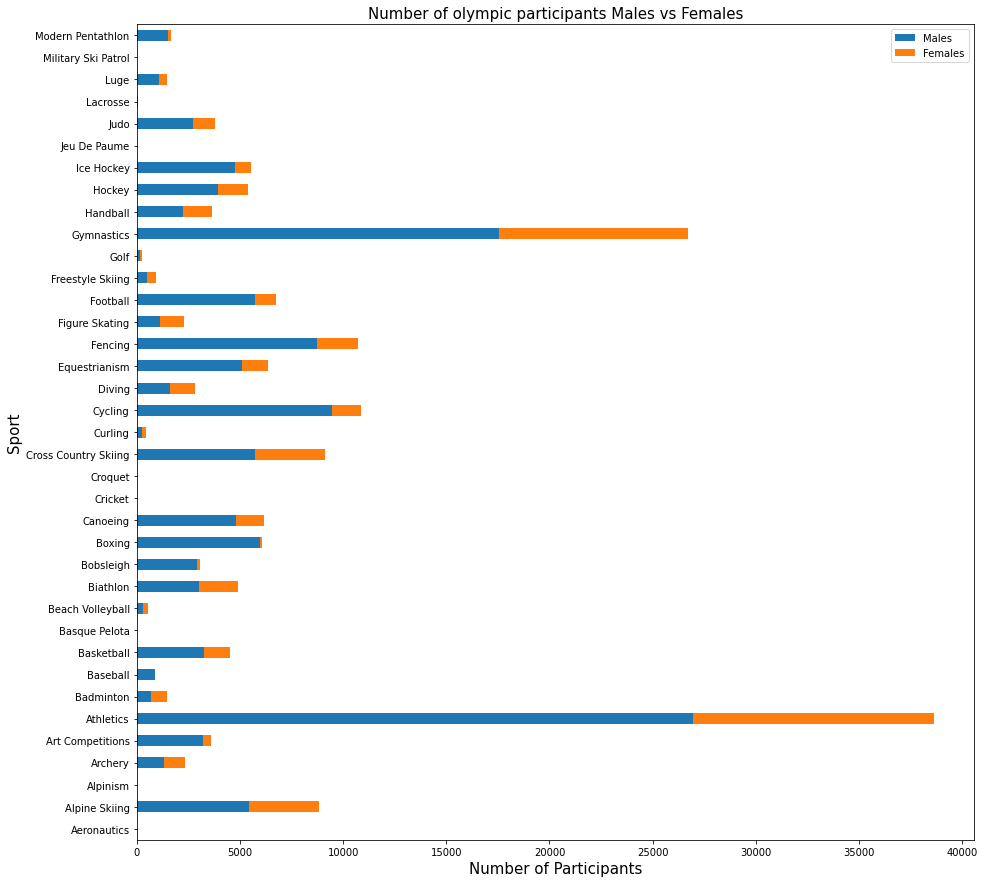

In [9]:

males_cont=df_olympic[df_olympic['Sex'] == "M"].groupby(['Sport'])['Sport'].count()
females_cont=df_olympic[df_olympic['Sex'] == "F"].groupby(['Sport'])['Sport'].count()
df_combinedGenderCount=pd.concat([males_cont, females_cont], axis=1)
df_combinedGenderCount.columns=['Males','Females']
df_combinedGenderCount=df_combinedGenderCount.fillna(0)

ax = df_combinedGenderCount[0:37].plot.barh(stacked=True);
ax.figure.set_size_inches(15,15)
ax.set_xlabel('Number of Participants',fontsize=15)
ax.set_ylabel('Sport',fontsize=15)
ax.set_title("Number of olympic participants Males vs Females",fontsize=15)

ax.legend(loc='upper right')

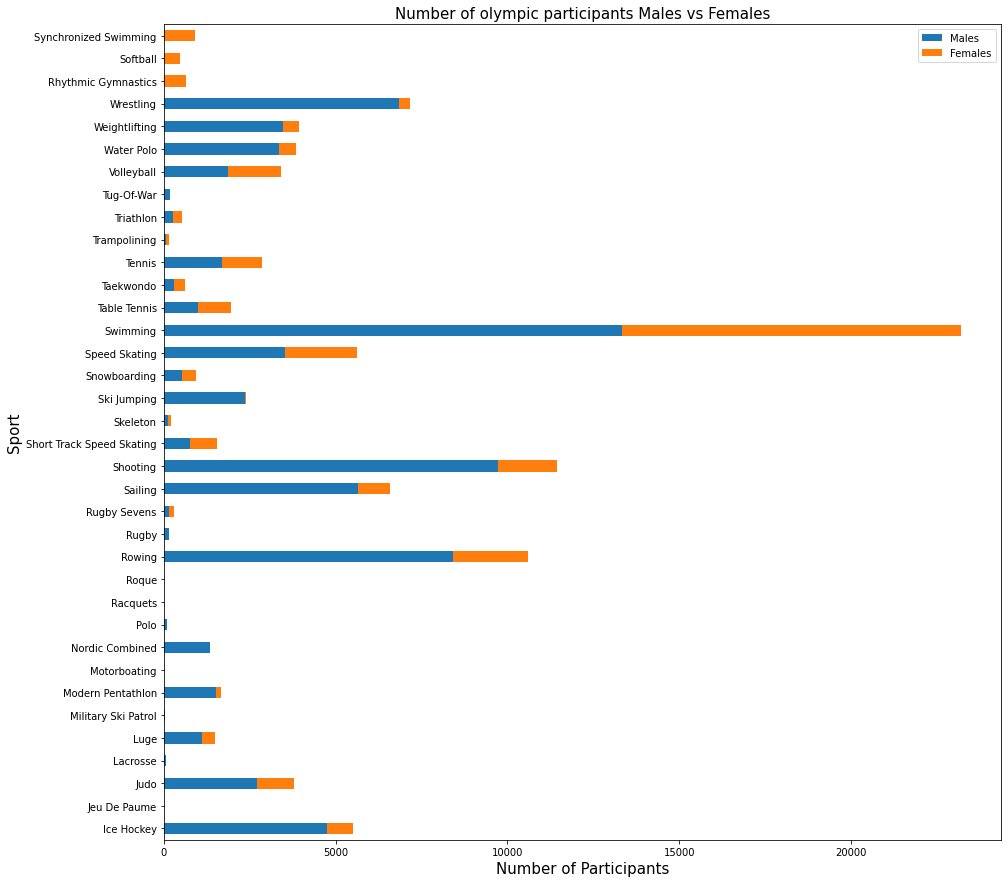

In [10]:
ax = df_combinedGenderCount[30:].plot.barh(stacked=True);
ax.figure.set_size_inches(15,15)
ax.set_xlabel('Number of Participants',fontsize=15)
ax.set_ylabel('Sport',fontsize=15)
ax.set_title("Number of olympic participants Males vs Females",fontsize=15)
ax.legend(loc='upper right')

# Data cleaning

### We will take a look over how many Nan values each column has

In [11]:
missing_values_count_athletes = df_olympic.isnull().sum()
print(missing_values_count_athletes)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


### Medals has the most missing values but thats normal because most of the olympic participants dont get a medal
### As for the age height and weight however we need to fill in these values

# Weight and Height Imputation
### We can not just take the mean of the weight and height since there are many types of events with different weight and height like Athletics and gymnastics for example we cant group their average height together. Furthermore, weight and height differ from male and female. 

### So instead we will take the average of each gender and sport pair together and fill that average to the ones with the same gender and sport . But first we will take a look if there is any outliers that need to be removed

## Height Analysis

<AxesSubplot:xlabel='Height', ylabel='Density'>

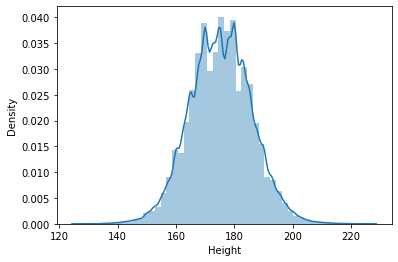

In [12]:
sns.distplot(df_olympic["Height"])

### lets analyze the Height Outliers

<AxesSubplot:xlabel='Height'>

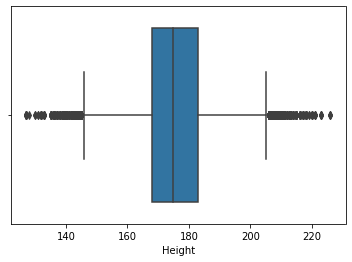

In [13]:
sns.boxplot(df_olympic["Height"])

In [14]:
df_olympic[df_olympic.Height>200].sort_values(by='Age',ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
130461,65675,Alfred Joan Labouchere,M,61.0,201.0,NaN,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Men's epee, Team",NaN
130460,65675,Alfred Joan Labouchere,M,41.0,201.0,NaN,Netherlands,NED,1908 Summer,1908,Summer,London,Fencing,"Fencing Men's Sabre, Individual",NaN
23815,12510,Philippe Boccara,M,41.0,203.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",NaN
130459,65675,Alfred Joan Labouchere,M,41.0,201.0,NaN,Netherlands,NED,1908 Summer,1908,Summer,London,Fencing,"Fencing Men's epee, Team",NaN
130458,65675,Alfred Joan Labouchere,M,41.0,201.0,NaN,Netherlands,NED,1908 Summer,1908,Summer,London,Fencing,"Fencing Men's epee, Individual",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256929,128654,Wang Zhizhi,M,17.0,215.0,110.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,NaN
269244,134728,Zheng Haixia,F,17.0,204.0,115.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze
228959,114958,Mariya Aleksandrovna Stepanova,F,17.0,202.0,85.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,NaN
265715,132953,Yi Jianlian,M,16.0,213.0,113.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN


In [15]:
df_olympic[df_olympic.Height<140].sort_values(by='Age',ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
114423,57941,Daniel Jerem Kaswanga,M,28.0,138.0,67.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Cycling,Cycling Men's 100 kilometres Team Time Trial,NaN
220270,110638,Boston Simbeye,M,28.0,130.0,67.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Welterweight,NaN
11420,6237,Peter Ayesu,M,26.0,135.0,51.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Flyweight,NaN
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN
77906,39559,Maureen Jean George,F,24.0,138.0,66.0,Zimbabwe,ZIM,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126542,63816,Carolyn Patricia Krau,F,12.0,137.0,36.0,Great Britain-2,GBR,1956 Winter,1956,Winter,Cortina d'Ampezzo,Figure Skating,Figure Skating Mixed Pairs,NaN
3510,2003,Said Mubarak Marhoon Al-Khatry,M,NaN,132.0,66.0,Oman,OMA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN
3778,2174,Khamis Mohamed Saif Al-Subhi,M,NaN,132.0,58.0,Oman,OMA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN
68861,35122,Nadia Fezzani,F,NaN,131.0,41.0,Libya,LBA,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Women's 100 metres Freestyle,NaN


### Although at first Glance there might seem like there is a lot of outliers. All of the height outliers are not irregular or un-natural they are all normal heights but in the middle of olympics participants they might seem like outlier but since they are all normals heights we decided to leave them

## Weight analysis

<AxesSubplot:xlabel='Weight', ylabel='Density'>

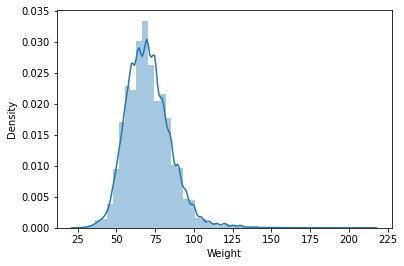

In [16]:
sns.distplot(df_olympic["Weight"])

<AxesSubplot:xlabel='Weight'>

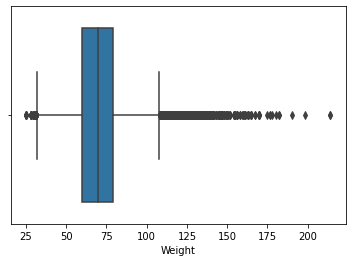

In [17]:
sns.boxplot(df_olympic["Weight"])

In [18]:
df_olympic[df_olympic.Weight>175].sort_values(by='Age',ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
75031,38075,Marek Galiski,M,29.0,200.0,190.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN
206004,103413,Leonel Wilfredo Ruz Carmona,M,29.0,187.0,178.0,Venezuela,VEN,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN
206352,103580,Valentyn Rusliakov,M,28.0,187.0,180.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Judo,Judo Men's Heavyweight,NaN
205467,103159,Aytami Ruano Vega,M,27.0,200.0,198.0,Spain,ESP,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN
94363,47755,"Marcus Jerrold ""Mark"" Henry",M,25.0,190.0,176.5,United States,USA,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN
237039,118869,"Christopher J. ""Chris"" Taylor",M,22.0,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN
237040,118869,"Christopher J. ""Chris"" Taylor",M,22.0,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Bronze
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
94362,47755,"Marcus Jerrold ""Mark"" Henry",M,21.0,190.0,176.5,United States,USA,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN


## like the height the weight outliers are normal specially in Judo, Weightlifting and wrestling sports. So we decided to leave them

## Now we will impute the data using multivariant imputation

In [19]:
df_olympic['Weight'].fillna(df_olympic.groupby(['Sex','Sport'])['Weight'].transform('median'),inplace=True)
df_olympic['Height'].fillna(df_olympic.groupby(['Sex','Sport'])['Height'].transform('mean'),inplace=True)

In [20]:
missing_values_count_athletes = df_olympic.isnull().sum()
print(missing_values_count_athletes)

ID             0
Name           0
Sex            0
Age         9474
Height       100
Weight       595
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


## There might still be nan values because some gender and sport combinations doesnt have any weight or height enteries so for the rest of them we will fill with average of the gender

In [21]:
df_olympic['Weight'].fillna(df_olympic.groupby(['Sex'])['Weight'].transform('median'),inplace=True)
df_olympic['Height'].fillna(df_olympic.groupby(['Sex'])['Height'].transform('mean'),inplace=True)

In [22]:
missing_values_count_athletes = df_olympic.isnull().sum()
print(missing_values_count_athletes)

ID             0
Name           0
Sex            0
Age         9474
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


### Now we have no Nan values for the height and weight but we still have a lot for the age

# Age Imputation
### Lets take a look at the distribution of the age

<AxesSubplot:xlabel='Age', ylabel='Density'>

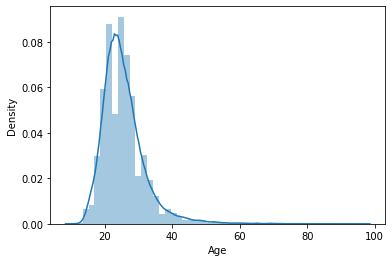

In [23]:
sns.distplot(df_olympic["Age"])

### The graph is right skewed so lets check if there are any outliers

<AxesSubplot:xlabel='Age'>

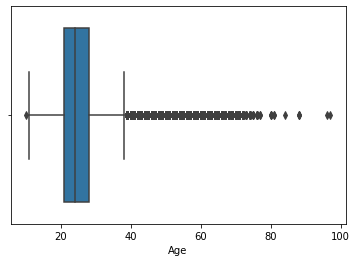

In [24]:
sns.boxplot(df_olympic["Age"])

### There seems to be many records above the maximum range which is around 40 years old so lets take a look at them

In [25]:
df_olympic[df_olympic.Age>40].sort_values(by='Age',ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,174.896552,76.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
98118,49663,Winslow Homer,M,96.0,174.896552,76.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,174.896552,76.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,174.896552,76.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,174.896552,76.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178890,89902,sten stensen,M,41.0,175.977163,77.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Rifle, Prone, 600 metr...",NaN
178891,89902,sten stensen,M,41.0,175.977163,77.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Rifle, Standing, 300 m...",NaN
178892,89902,sten stensen,M,41.0,175.977163,77.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Rifle, 300 metres and ...",Silver
178893,89902,sten stensen,M,41.0,175.977163,77.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Small-Bore Rifle, Standing, 50 ...",NaN


### We can notice that most of the extreme age outliers are participants of the Art Competitions Event. After doing some research to check if those age values are error or real values. We discovered that they are real since in the early years there was art competitions for artists to show their sculputres and paitings and it was normal to find a lot of old participants. So we will leave these valuse.

### Since there are no false outliers we will fill in the missing values in the age column with the median of the age.
### The median age of our dataset is 24 and after doing some research it is actually the median age of olympic participants.

In [26]:
df_olympic["Age"].median()

24.0

In [27]:
df_olympic['Age'].fillna(df_olympic.Age.median(),inplace=True)

### We can see there are no Nan values in our numerical columns and as for the nan values in the medals we can filter those records out when wanting to deal with olympic medalists only. but we will leave them for now

In [28]:
missing_values_count_athletes = df_olympic.isnull().sum()
print(missing_values_count_athletes)

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


# 

# Research Questions

#### 1- Countries that won most medals ?   : Using medalist integrated dataframe
#### 2- Countries that won most medals in summer olympics?
#### 3- Countries that won most medals in winter olympics?
#### ^^ all of the above questions again but in order of Gold medals^^
#### 4.A- For the number one country in summer games what is the sport that gianed it the most medals?
#### 4.B- Top countries in that sport?
#### 5.A- Is there a relation between this sport and the players average height in the top teams?
#### 5.B- Is there a relation between this sport and the players average height across all teams?
#### 6.A- For the number one country in winter games what is the sport that gained it the most medals?
#### 6.B- Top countries in that sport?
#### 7.A- Is there a relation between this sport and players average BMI for the top teams?  :Using BMI Column
#### 7.B- Is there a relation between this sport and players average BMI for all teams?     : Using BMI column
#### 8- Athletes that brought the most medals to their teams? : Using All time total column

# Milestone 2

# 1-Data Integration

## Merge NOC with olympic

In [29]:
df_regions = pd.read_csv('noc_regions.csv')
df_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [30]:
req=df_olympic[['Team','NOC','Year','Medal']][~df_olympic['Medal']. isna()]
df_olympic_noc=pd.merge(req, df_regions).drop(['notes'],axis=1)
df_olympic_noc.head(10)

,Team,NOC,Year,Medal,region
0,Denmark/Sweden,DEN,1900,Gold,Denmark
1,Denmark,DEN,1920,Gold,Denmark
2,Nykjbings paa Falster,DEN,1912,Gold,Denmark
3,Denmark,DEN,1906,Gold,Denmark
4,Denmark,DEN,1908,Bronze,Denmark
5,Denmark,DEN,1996,Gold,Denmark
6,Denmark,DEN,2016,Bronze,Denmark
7,Denmark,DEN,1912,Bronze,Denmark
8,Denmark,DEN,1996,Gold,Denmark
9,Denmark,DEN,2000,Gold,Denmark


## Now we need to add the Medals dataset
#### The Medals dataset includes the number of medals each team has won across 2021 olympics so before adding it to our existing dataset we want our dataset to have the same look and columns which are Team/NOC, Gold, Silver, Bronze, Total.
#### We need to add the year column with 2021 to the medals dataframe. We will also drop the rest of the columns from the medals because we dont need them


In [31]:
df_medals= pd.read_csv('Medals.csv')
df_medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [32]:
df_medals=df_medals.drop(['Rank','Rank by Total'],axis=1)
df_medals['Year']=2021

In [33]:
df_medals=df_medals[['Team/NOC','Gold','Silver','Bronze','Total']]

In [34]:
df_medals.head()

,Team/NOC,Gold,Silver,Bronze,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71


## Now we will create the same look for our dataset
## Add: Gold,Silver,Bronze,Total for each year

In [35]:
# Create the count for each column
gold = df_olympic_noc.loc[df_olympic_noc['Medal']=='Gold']
gold = pd.Series(gold.groupby(['NOC','Year'])['Medal'].size(), dtype=np.int64,name='Gold')
silver = df_olympic_noc.loc[df_olympic_noc['Medal']=='Silver']
silver = pd.Series(silver.groupby(['NOC','Year'])['Medal'].size(), dtype=np.int64,name='Silver')
bronze = df_olympic_noc.loc[df_olympic_noc['Medal']=='Bronze']
bronze = pd.Series(bronze.groupby(['NOC','Year'])['Medal'].size(), dtype=np.int64,name='Bronze')
total= pd.Series(df_olympic_noc.groupby(['NOC','Year']).size(), dtype=np.int64, name='Total')

In [36]:
# Merge the columns
new_olympic =pd.merge(df_olympic_noc,gold,how='left',left_on=['NOC','Year'], right_on = ['NOC','Year'])
new_olympic =pd.merge(new_olympic,silver,how='left',left_on=['NOC','Year'], right_on = ['NOC','Year'])
new_olympic =pd.merge(new_olympic,bronze,how='left',left_on=['NOC','Year'], right_on = ['NOC','Year'])
new_olympic =pd.merge(new_olympic,total,how='left',left_on=['NOC','Year'], right_on = ['NOC','Year'])
new_olympic = new_olympic.fillna(0)
new_olympic =new_olympic.astype({"Gold":'int',"Silver":'int', "Bronze":'int',  "Total":'int'})
new_olympic = new_olympic.drop(['Medal','region','NOC'],axis=1)

In [37]:
new_olympic = new_olympic.rename(columns={"Team": "Team/NOC"})

### Now we will concatenate the 2021 results to our dataframe

In [38]:
df_medals.shape

(93, 5)

In [39]:
new_olympic.shape

(39774, 6)

## Now we have a new dataset that has each team and their medals till 2021

In [40]:
df_teamMedals=pd.concat([new_olympic,df_medals])
df_teamMedals.head()

,Team/NOC,Year,Gold,Silver,Bronze,Total
0,Denmark/Sweden,1900.0,4,3,2,9
1,Denmark,1920.0,26,44,1,71
2,Nykjbings paa Falster,1912.0,5,49,33,87
3,Denmark,1906.0,14,19,1,34
4,Denmark,1908.0,0,14,3,17


In [41]:
df_teamMedals.shape

(39867, 6)

# 2- Feature Engineering

## -Add BMI column for each athlete

In [42]:
# According to the dataset description the weight is in KG and height is in cm
# so we will convert the height to be in meteres before converting it to BMI
df_olympic['BMI']=(df_olympic['Weight'])/(df_olympic['Height']**2/100)
df_olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,1,A Dijiang,M,24.0,180.000000,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0.246914
1,2,A Lamusi,M,23.0,170.000000,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0.207612
2,3,Gunnar Nielsen Aaby,M,24.0,177.480339,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0.231751
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0.285294
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0.239591


## - Add  Total : total medals for athlete in each year

In [43]:
df_medals=df_olympic[df_olympic['Medal'].isnull()==False]

In [44]:
df_athleteTotal = pd.Series(df_medals.groupby('Name')['Name'].count().sort_values(ascending=False),name='All Time Total').fillna(0)
df_olympic=pd.merge(df_olympic,df_athleteTotal,how='left',left_on=['Name'], right_on = ['Name'])
df_olympic['All Time Total']=df_olympic['All Time Total'].fillna(0)
df_olympic=df_olympic.astype({"All Time Total":'int'});

In [45]:
df_olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI,All Time Total
0,1,A Dijiang,M,24.0,180.000000,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0.246914,0
1,2,A Lamusi,M,23.0,170.000000,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0.207612,0
2,3,Gunnar Nielsen Aaby,M,24.0,177.480339,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0.231751,0
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0.285294,1
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0.239591,0


# Now we will try and answer the research questions

# Note:
## Medals are counted per athlete in this project, unlike the wikepdia results. Since if a basketball team won gold medals they will receive a total of 10 medals however USA will have 1 gold medal added to its name in wikipedia. But we cant do this here since in a sport like Athletics there are multiple different events and some events contain teams and we dont know the who is playing what event and with which team. So we decided that medals/athlete is the best decision for this dataset.



# Analysing top countries with medals across history

### Lets see top 5 countries with the most medals across history

### Q1- Top 5 teams in total medals gained across history
#### Used df_teamMedals that we constructed in Data Integration

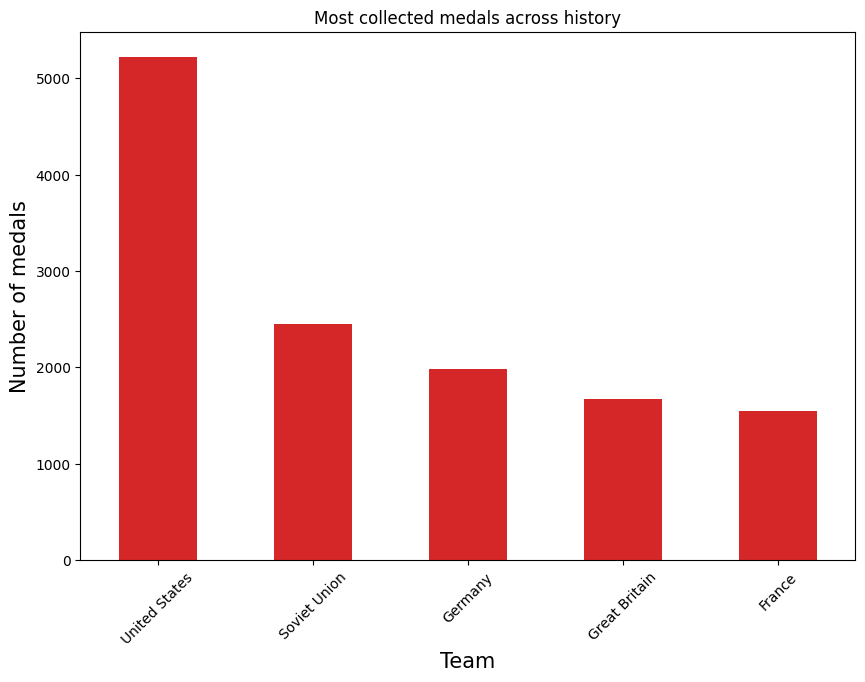

In [46]:
df_top=df_teamMedals
fig,axs=plt.subplots(1,1,dpi=100)
axs.set_ylabel('Number of medals',fontsize=15)
axs.set_xlabel('Team',fontsize=15)
axs.set_title('Most collected medals across history')
ax=df_top['Team/NOC'].value_counts().head(5).plot(kind='bar',color='C3')
plt.xticks(rotation=45)
ax.figure.set_size_inches(10,7)

## United states is the number one country

### Lets see the top 5 sorted  by Gold medals but show the bronze and silver medals too for each team

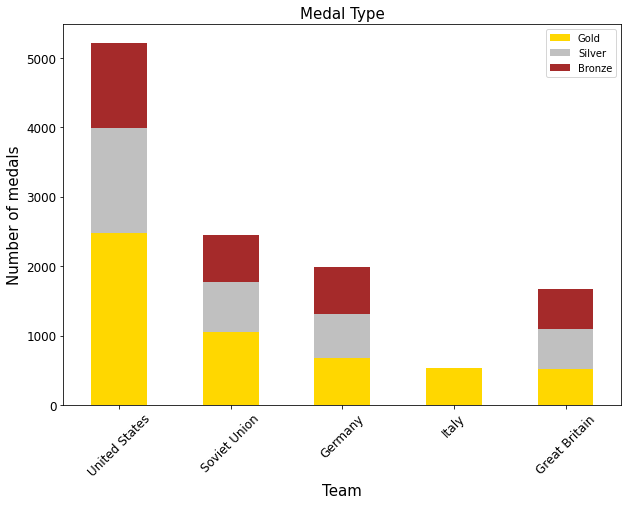

In [47]:
df_medalist = df_olympic[~df_olympic.isnull().any(axis=1)]
df_medalist_team_Gold = df_medalist.loc[df_medalist['Medal'] == 'Gold']
df_medalist_team_Silver = df_medalist.loc[df_medalist['Medal']=='Silver']
df_medalist_team_Bronze = df_medalist.loc[df_medalist['Medal']=='Bronze']

top_Gold=df_medalist_team_Gold['Team'].value_counts().head(5)
top_Silver=df_medalist_team_Silver['Team'].value_counts().head(5)
top_Bronze=df_medalist_team_Bronze['Team'].value_counts().head(5)
combined_medalists=pd.concat([top_Gold,top_Silver,top_Bronze],axis=1,join='outer')
combined_medalists.columns=['Gold','Silver','Bronze']
combined_medalists=combined_medalists[np.isnan(combined_medalists['Gold'])==False]
ax = combined_medalists.plot.bar(stacked=True,color={'Bronze':'Brown','Silver':'Silver','Gold':'Gold'},title='Medal Type');
ax.set_ylabel('Number of medals',fontsize=15)
ax.set_xlabel('Team',fontsize=15)
ax.set_title('Medal Type',fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.xticks(rotation=45)
ax.figure.set_size_inches(10,7)



### USA is dominating all teams across all  medals as we can see from the graph, and there isnt even a close competition from other teams. But lets further analyze this and since there are two main types of olympics which are Summer and Winter olympics lets see if USA is the top in both of them

# Q2 Top teams in summer games
## Summer Results

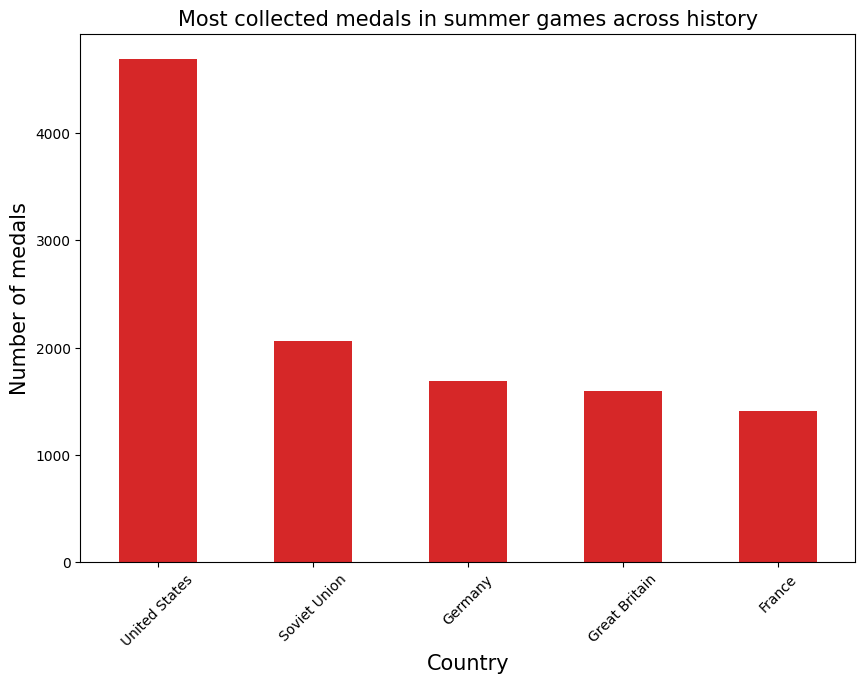

In [48]:
df_medalist_summer = df_medalist.loc[df_medalist['Season']=='Summer']
fig,axs=plt.subplots(1,1,dpi=100)
axs.set_ylabel('Number of medals',fontsize=15)
axs.set_xlabel('Country',fontsize=15)
axs.set_title('Most collected medals in summer games across history',fontsize=15)
axs=df_medalist_summer['Team'].value_counts().head(5).plot(kind='bar',color='C3');
plt.xticks(rotation=45)
axs.figure.set_size_inches(10,7)


## USA number one in summer games followed by the soviet union

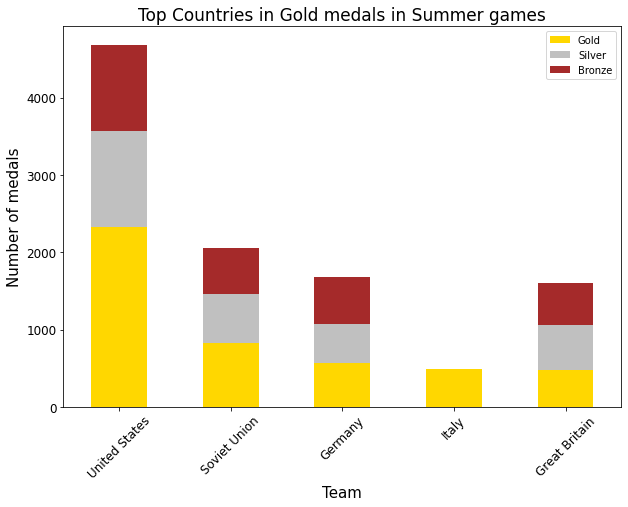

In [49]:
df_medalist_team_Gold = df_medalist_summer.loc[df_medalist['Medal'] == 'Gold']
df_medalist_team_Silver = df_medalist_summer.loc[df_medalist['Medal']=='Silver']
df_medalist_team_Bronze = df_medalist_summer.loc[df_medalist['Medal']=='Bronze']

top_Gold_summer=df_medalist_team_Gold['Team'].value_counts().head(5)
top_Silver_summer=df_medalist_team_Silver['Team'].value_counts().head(5)
top_Bronze_summer=df_medalist_team_Bronze['Team'].value_counts().head(5)
combined_medalists=pd.concat([top_Gold_summer,top_Silver_summer,top_Bronze_summer],axis=1,join='outer')
combined_medalists.columns=['Gold','Silver','Bronze']
combined_medalists=combined_medalists[np.isnan(combined_medalists['Gold'])==False]
ax = combined_medalists.plot.bar(stacked=True,color={'Bronze':'Brown','Silver':'Silver','Gold':'Gold'},title='Medal Type');
ax.set_ylabel('Number of medals',fontsize=15)
ax.set_xlabel('Team',fontsize=15)
ax.set_title('Top Countries in Gold medals in Summer games',fontsize=17)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.xticks(rotation=45)
ax.figure.set_size_inches(10,7)

## USA also number one in terms of gold medals

# Q3 Top teams in winter games
## Winter Results

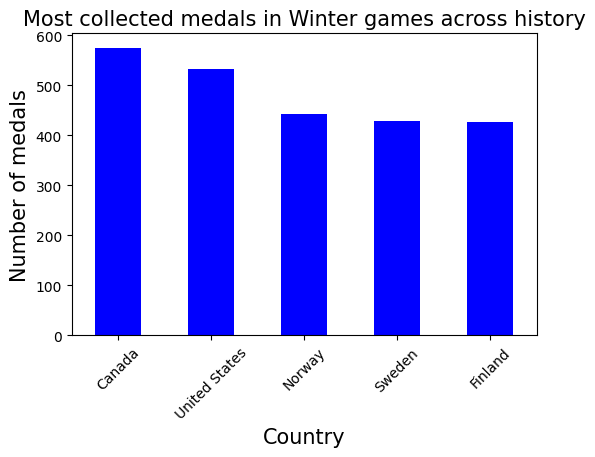

In [50]:
df_medalist_winter = df_medalist.loc[df_medalist['Season']=='Winter']
fig,axs=plt.subplots(1,1,dpi=100)
axs.set_ylabel('Number of medals',fontsize=15)
axs.set_xlabel('Country',fontsize=15)
axs.set_title('Most collected medals in Winter games across history',fontsize=15)
axs=df_medalist_winter['Team'].value_counts().head(5).plot(kind='bar',color='Blue')
plt.xticks(rotation=45)
ax.figure.set_size_inches(10,7)

## Canada number one in winter games

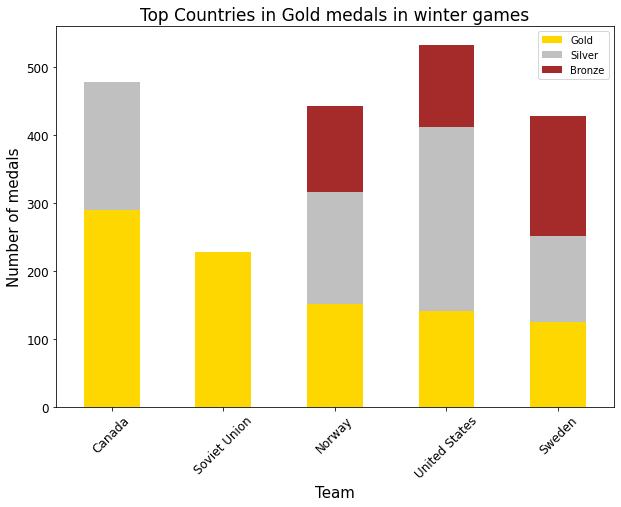

In [51]:

df_medalist_team_Gold = df_medalist_winter.loc[df_medalist['Medal'] == 'Gold']
df_medalist_team_Silver = df_medalist_winter.loc[df_medalist['Medal']=='Silver']
df_medalist_team_Bronze = df_medalist_winter.loc[df_medalist['Medal']=='Bronze']

top_Gold_winter=df_medalist_team_Gold['Team'].value_counts().head(5)
top_Silver_winter=df_medalist_team_Silver['Team'].value_counts().head(5)
top_Bronze_winter=df_medalist_team_Bronze['Team'].value_counts().head(5)
combined_medalists=pd.concat([top_Gold_winter,top_Silver_winter,top_Bronze_winter],axis=1,join='outer')
combined_medalists.columns=['Gold','Silver','Bronze']
combined_medalists=combined_medalists[np.isnan(combined_medalists['Gold'])==False]
ax = combined_medalists.plot.bar(stacked=True,color={'Bronze':'Brown','Silver':'Silver','Gold':'Gold'},title='Medal Type');
ax.set_ylabel('Number of medals',fontsize=15)
ax.set_xlabel('Team',fontsize=15)
ax.set_title('Top Countries in Gold medals in winter games',fontsize=17)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.xticks(rotation=45)
ax.figure.set_size_inches(10,7)

## Canada number one in gold medals winter games

### It seems like in the winter olympics for Gold medals Canada is the top country followed by soviet union and norway then the USA is in 4th place which is to be expected since the top 3 countries have the winter season most of the year and there main focus is on the winter games 

### For the summer games in Gold medals USA is the top country followed by  Soviet Union and Germany but its not even a close competition unlike the Winter games.

### Lets dive deeper and try and find out why does the USA is dominating the summer games and if we can find any relations between the sports that gets the usa the most medals and their players height and weight compared to othe players

# Q4.A 
### What is the sport that got the USA the most modeals across history?

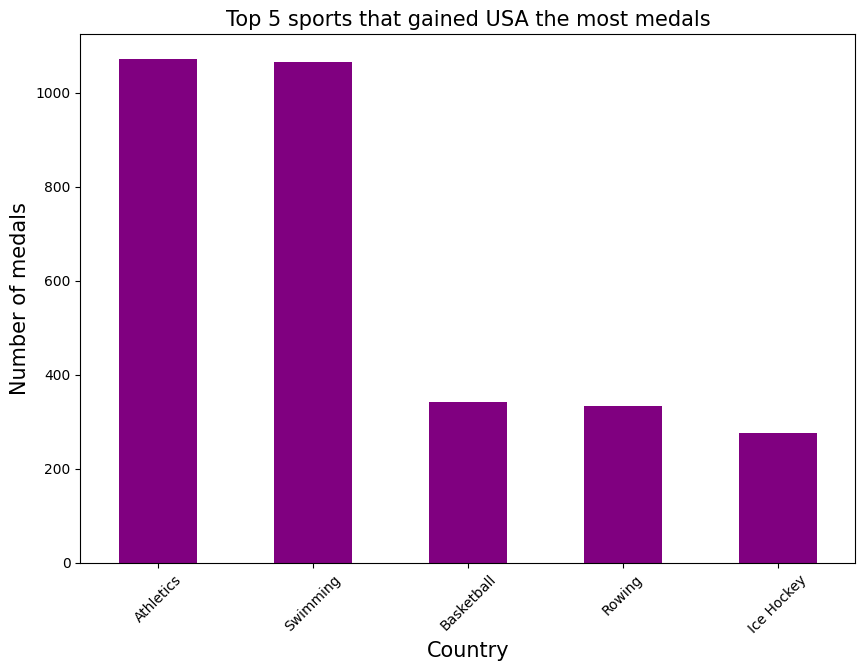

In [52]:
df_medalist_united_states = df_medalist.loc[df_medalist['Team']=='United States']
fig,axs=plt.subplots(1,1,dpi=100)
axs.set_ylabel('Number of medals',fontsize=15)
axs.set_xlabel('Country',fontsize=15)
axs.set_title('Top 5 sports that gained USA the most medals',fontsize=15)
axs=df_medalist_united_states['Sport'].value_counts().head(5).plot(kind='bar',color='Purple')
plt.xticks(rotation=45)
axs.figure.set_size_inches(10,7)

### It looks like Athletics is the golden game for USA and collected them most medals.
### Lets try and see if there is a relation between the teams average height and winning in athletics for all teams.

# Q4.B
### First lets see top 10 Countries in Athletics medals

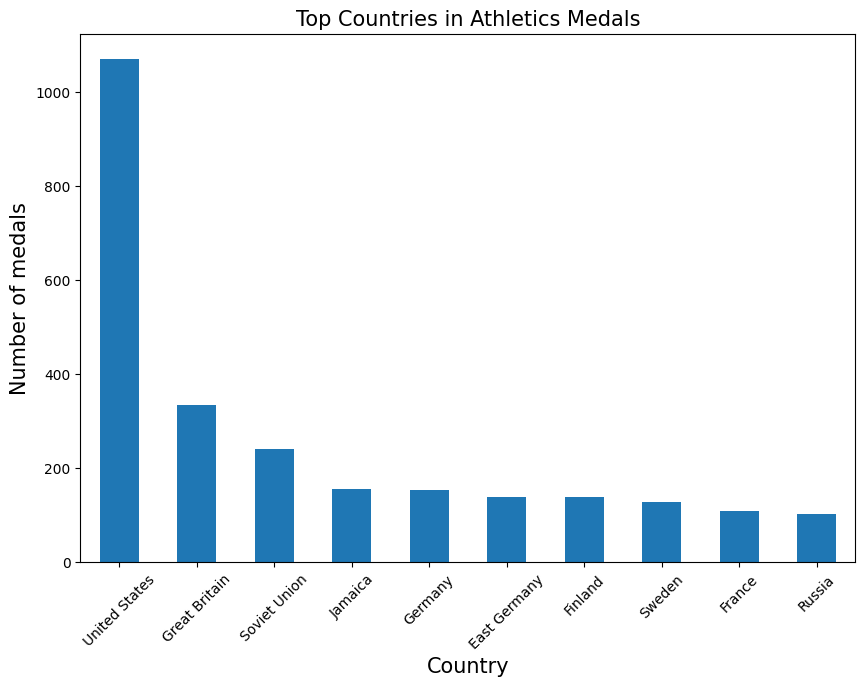

In [53]:
df_medalist_athletics = df_medalist[df_medalist['Sport']=="Athletics"]
fig,axs=plt.subplots(1,1,dpi=100)
axs.set_ylabel('Number of medals',fontsize=15)
axs.set_xlabel('Country',fontsize=15)
axs.set_title('Top Countries in Athletics Medals',fontsize=15)
axs=df_medalist_athletics['Team'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)

axs.figure.set_size_inches(10,7)

## As expected USA is nmber one followed by biritain and soviet union

# Question 5.A
## Lets see if there is a relation between the average height of the athletics participants and the number of medals won

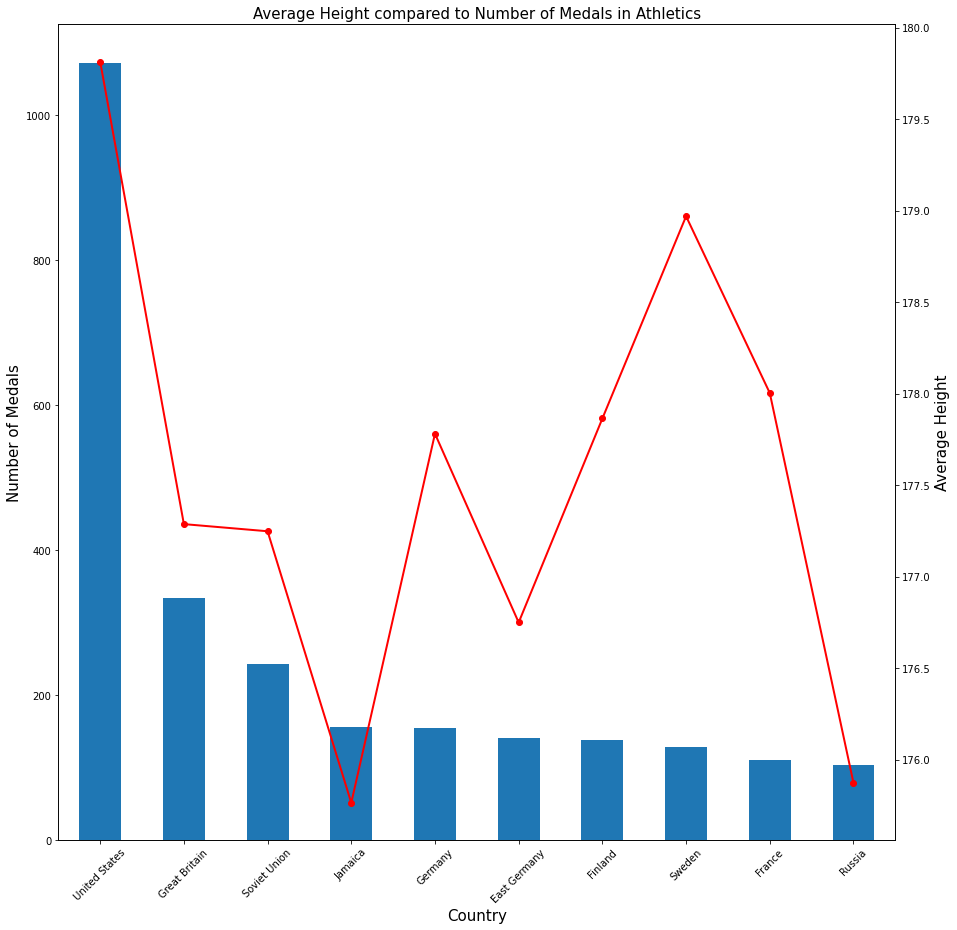

In [54]:
df_medalist_athletics = df_olympic.loc[df_olympic['Sport']=="Athletics"]
df_medalist_athletics=df_medalist_athletics[~df_medalist_athletics['Medal'].isna()]
df_medalist_athletics['Height'].mean()
total_medals=df_medalist_athletics['Team'].value_counts()
average_heights=df_medalist_athletics.groupby('Team')['Height'].mean().sort_values(ascending=False)
medals_height=pd.concat([total_medals,average_heights],axis=1)
medals_height.columns=['Medals','Average Height']
fig = plt.figure()

ax = medals_height['Medals'].sort_values(ascending=False).head(10).plot(kind='bar', use_index=True)
plt.xticks(rotation=45)
ax2 = ax.twinx()

ax2.plot(medals_height.sort_values('Medals',ascending=False)['Average Height'].head(10), linestyle='-', marker='o', linewidth=2.0,color='red')



ax.set_ylabel('Number of Medals',fontsize=15)
ax.set_xlabel('Country',fontsize=15)
ax.set_title('Average Height compared to Number of Medals in Athletics',fontsize=15)
ax.figure.set_size_inches(15,15)

ax2.set_ylabel('Average Height',fontsize=15);


## since the red line which is height is fluctuating even though the medals are decreasing that means that for the top 10 countries height doesnt play a huge role in terms of winning.

# Question 5.B
## For the top teams there seems to be no relation but what about all the teams


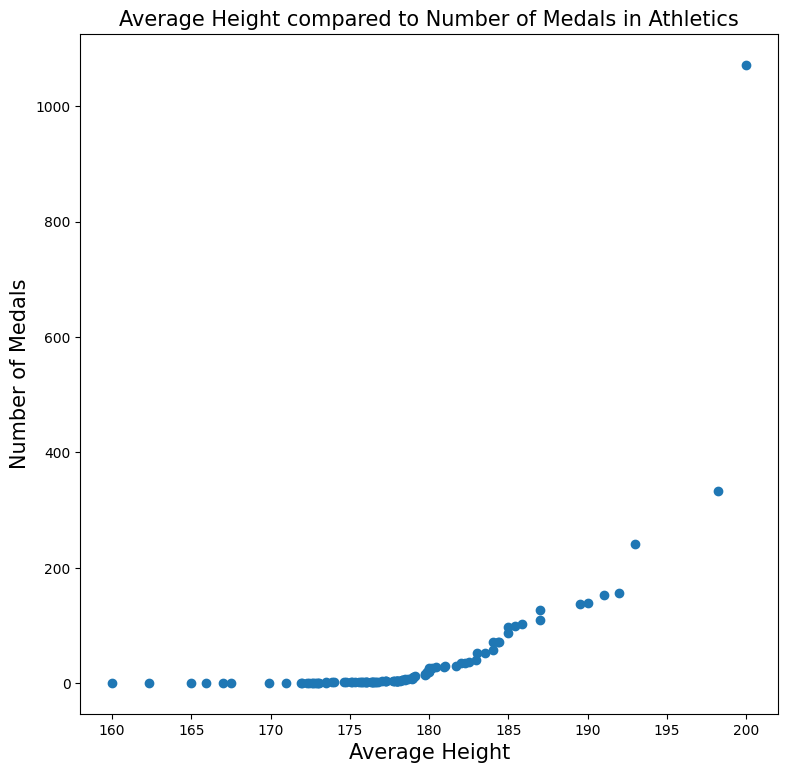

In [55]:
fig,ax=plt.subplots(1,1,dpi=100)
ax.set_ylabel('Number of Medals',fontsize=15)
ax.set_xlabel('Average Height',fontsize=15)
ax.set_title('Average Height compared to Number of Medals in Athletics',fontsize=15)
ax.figure.set_size_inches(9,9)
ax=ax.scatter(average_heights,total_medals)

## We can now see that there is a partly positive relation at the end of the graph between the average height of the teams and the number of medals gained. Which means that in athletics height has some role in winning.

# Question 6.A
### From the graph we can see that for Canada the number 1 country in winter games Ice Hokey has gained it the most medals.

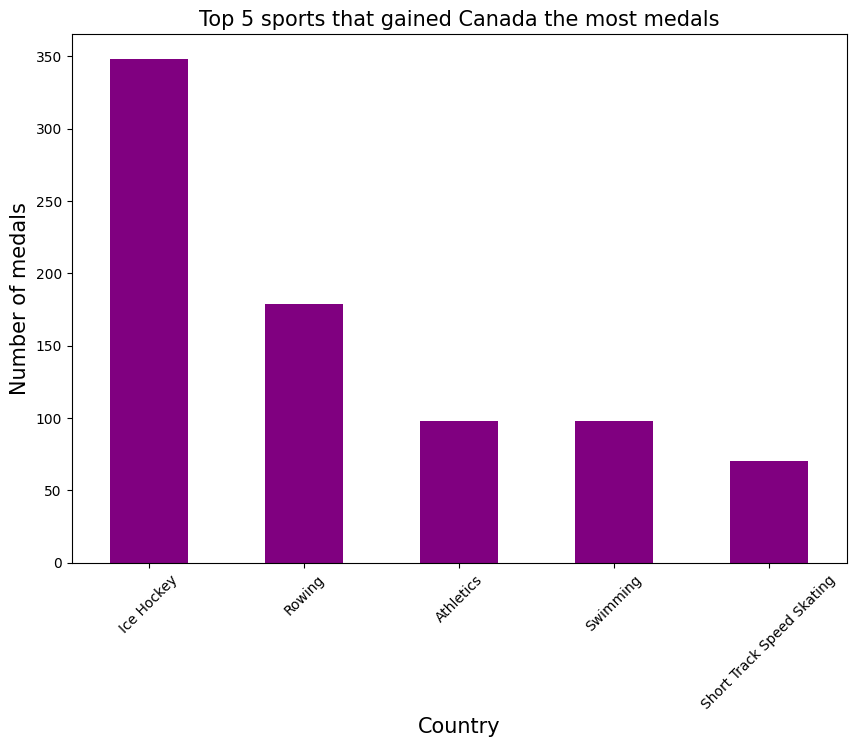

In [56]:
df_medalist_united_states = df_medalist.loc[df_medalist['Team']=='Canada']
fig,axs=plt.subplots(1,1,dpi=100)
axs.set_ylabel('Number of medals',fontsize=15)
axs.set_xlabel('Country',fontsize=15)
axs.set_title('Top 5 sports that gained Canada the most medals',fontsize=15)
axs=df_medalist_united_states['Sport'].value_counts().head(5).plot(kind='bar',color='Purple')
plt.xticks(rotation=45)
axs.figure.set_size_inches(10,7)

## Ice hockey is the golden game for Canda bringing it the most medals followed by rowing

# Question 6.B
### Top  countries in Ice Hockey

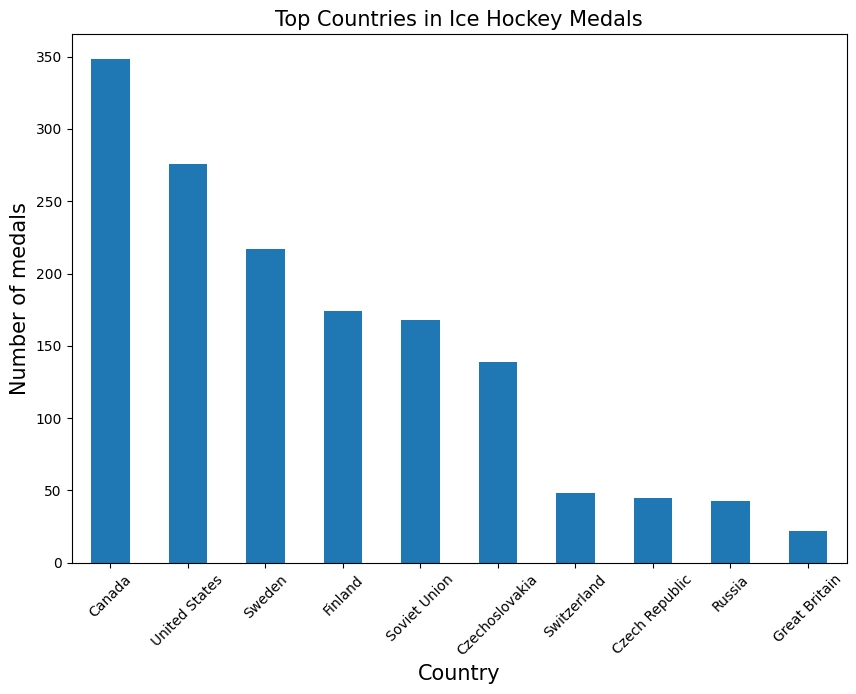

In [57]:
df_medalist_iceHockey = df_medalist[df_medalist['Sport']=="Ice Hockey"]
fig,axs=plt.subplots(1,1,dpi=100)
axs.set_ylabel('Number of medals',fontsize=15)
axs.set_xlabel('Country',fontsize=15)
axs.set_title('Top Countries in Ice Hockey Medals',fontsize=15)
axs=df_medalist_iceHockey['Team'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
axs.figure.set_size_inches(10,7);

## Canada is number one closely followed by USA in terms of medals from hockey.

# Question 7.A

### In the following graph the red line shows the number of medals while the bars show the Average BMI of the team so if there is a relation between the red line should go down as the blue bars go down but we can see that this is not the case as the BMI goes down the number of medals  fluctuate.
### So for the Top teams BMI doesnt really matter

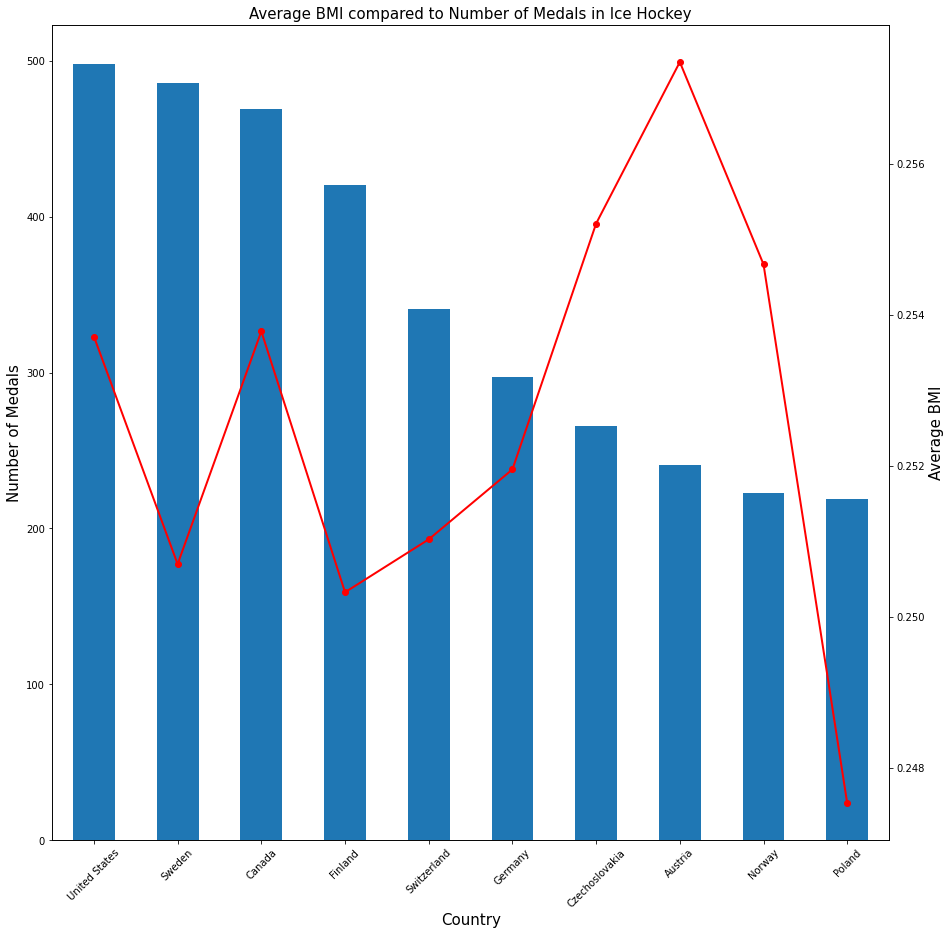

In [58]:
df_medalist_iceHockey.loc[df_medalist_iceHockey['Team']=='Canada'].size

df_medalist_iceHockey = df_olympic.loc[df_olympic['Sport']=="Ice Hockey"]

df_medalist_iceHockey['BMI'].mean()

total_medals_iceHockey=df_medalist_iceHockey['Team'].value_counts()

average_bmi=df_medalist_iceHockey.groupby('Team')['BMI'].mean().sort_values(ascending=False)
medals_bmi=pd.concat([total_medals_iceHockey,average_bmi],axis=1)
medals_bmi.columns=['Medals','Average BMI']
fig = plt.figure()

ax = medals_bmi['Medals'].sort_values(ascending=False).head(10).plot(kind='bar', use_index=True)
plt.xticks(rotation=45)
ax2 = ax.twinx()

ax2.plot(medals_bmi.sort_values('Medals',ascending=False)['Average BMI'].head(10), linestyle='-', marker='o', linewidth=2.0,color='red')



ax.set_ylabel('Number of Medals',fontsize=15)
ax.set_xlabel('Country',fontsize=15)
ax.set_title('Average BMI compared to Number of Medals in Ice Hockey',fontsize=15)
ax.figure.set_size_inches(15,15)

ax2.set_ylabel('Average BMI',fontsize=15);

## The BMI is fluctuating as the number of medas gained decrease so there isnt a clear relationship for the top teams but what about all the teams?

# Question 7.B

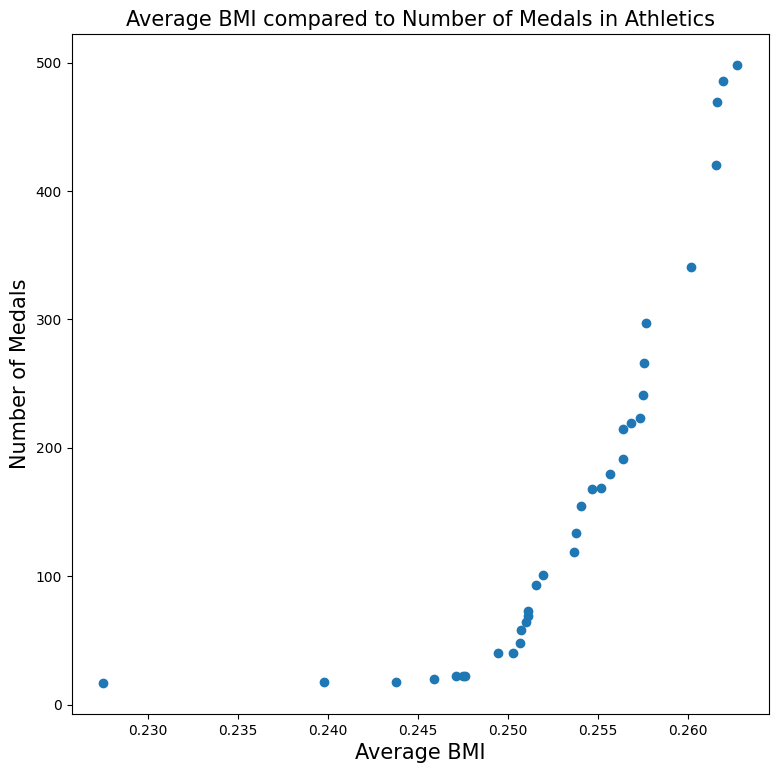

In [59]:
fig,ax=plt.subplots(1,1,dpi=100)
ax.set_ylabel('Number of Medals',fontsize=15)
ax.set_xlabel('Average BMI',fontsize=15)
ax.set_title('Average BMI compared to Number of Medals in Athletics',fontsize=15)
ax.figure.set_size_inches(9,9)
ax=ax.scatter(average_bmi,total_medals_iceHockey)

## We can see there is positive relation that as the average BMI increases the number of medals increase. So, BMI has a role in Ice Hockey medals.

# Question 8 
### Athletes that brought the most medals to their counries?

In [60]:
df_sorted=df_olympic.sort_values(by=['All Time Total'], ascending=False)[['Name','All Time Total']].drop_duplicates().head(10)

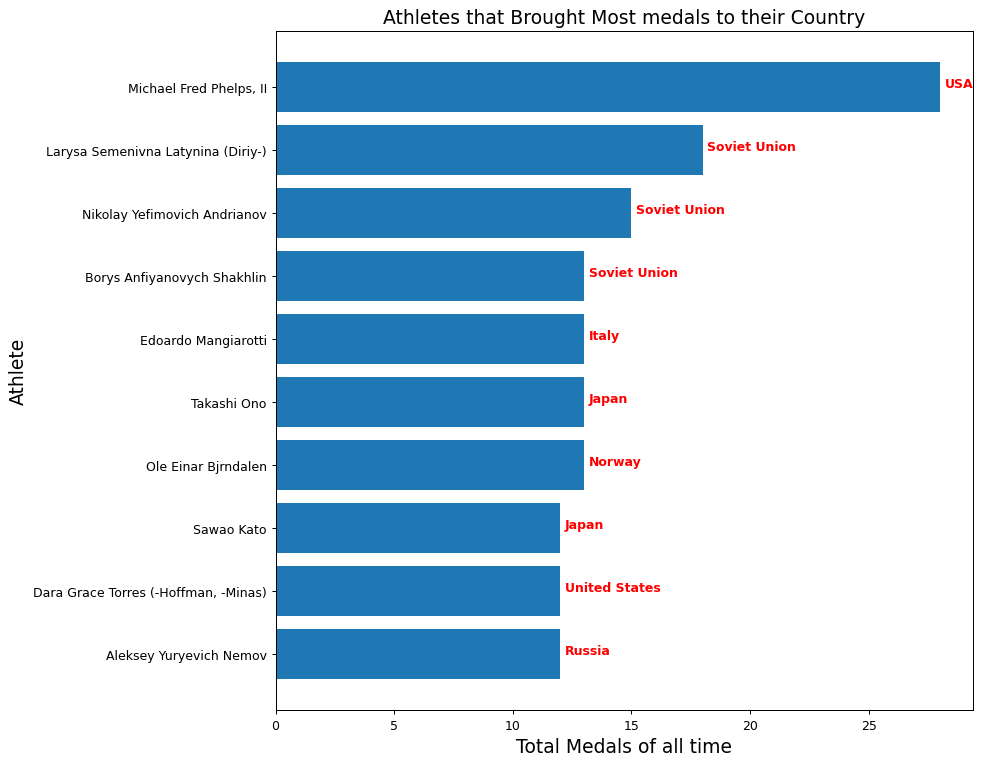

In [61]:
df_sorted=df_olympic.sort_values(by=['All Time Total'], ascending=False)[['Name','All Time Total','Team']].drop_duplicates().head(10)
fig,axs=plt.subplots(1,1,dpi=90)
axs.set_ylabel('Athlete',fontsize=15)
axs.set_xlabel('Total Medals of all time',fontsize=15)
axs.invert_yaxis()
axs.set_title('Athletes that Brought Most medals to their Country',fontsize=15)
bars = axs.barh(df_sorted['Name'],df_sorted['All Time Total'])
axs.figure.set_size_inches(10,10)
c=0
t=np.array(df_sorted['Team'])
t[0]='USA'
for i, v in enumerate(df_sorted['All Time Total']):
    axs.text(v + 0.2, i , t[c], color='red', fontweight='bold')
    c+=1

### From the above graph athletes with the most medals is Michael Phelps he brought with 28 medals to the USA. Followed by Larysa in the soviet Union